In [1]:
!pip install deepface --user

  Using cached deepface-0.0.79-py3-none-any.whl (49 kB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached Flask-2.2.3-py3-none-any.whl (101 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)
  Using cached retina_face-0.0.13-py3-none-any.whl (16 kB)
  Using cached gunicorn-20.1.0-py3-none-any.whl (79 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached beautifulsoup4-4.12.0-py3-none-any.whl (132 kB)
  Using cached filelock-3.10.4-py3-none-any.whl (10 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached grpcio-1.51.3-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cache

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [36]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

In [85]:
def compare_face_with_photo(img1_path: str, img2_path: str, enforce_detection: bool = True):
    """
    Verify two images
    :param img1_path: photos/img1.jpg
    :param img2_path: photos/img2.jpg
    :return: result
    """

    # read images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    # show images
    if img1 is None:
        print("The image with the path " + img1_path + " was not found")
        return
    plt.imshow(img1[:,:,::-1])
    plt.show()
    if img2 is None:
        print("The image with the path " + img2_path + " was not found")
        return
    plt.imshow(img2[:,:,::-1])
    plt.show()

    # verify images
    # try to use GPU if available
    result = None
    try:
        result = DeepFace.verify(img1_path, img2_path, model_name="Facenet", enforce_detection=enforce_detection, detector_backend="opencv", distance_metric="cosine")
    except ValueError:
       print("No face detected in one of the images")

    return result

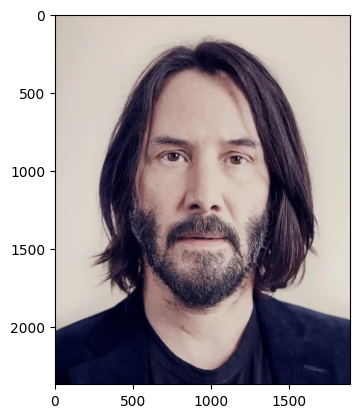

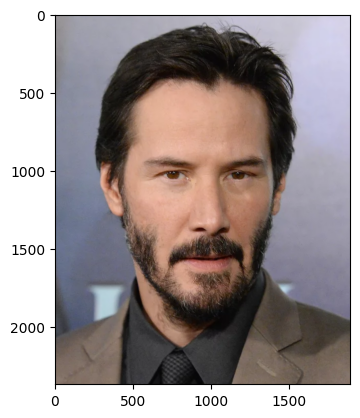

{'verified': True,
 'distance': 0.23419872372220174,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': 1101},
  'img2': {'x': 340, 'y': 531, 'w': 1280, 'h': 1280}},
 'time': 1.79}

In [86]:
compare_face_with_photo("keanu_reaves/keanu01.png", "keanu_reaves/keanu02.png")

In [88]:
def compare_face_with_folder(img1_path: str, folder_path: str, enforce_detection: bool = True):
    img1 = cv2.imread(img1_path)

    if img1 is None:
        print("The image with the path " + img1_path + " was not found")
        return

    results = []

    # show images
    plt.imshow(img1[:,:,::-1])
    plt.show()

    # get all files in folder
    files = os.listdir(folder_path)

    # verify images
    for file in files:
        if file != img1_path:
            result = DeepFace.verify(img1_path, folder_path + file, model_name="Facenet", enforce_detection=enforce_detection, detector_backend="opencv", distance_metric="cosine")
            results.append(result)

    return results

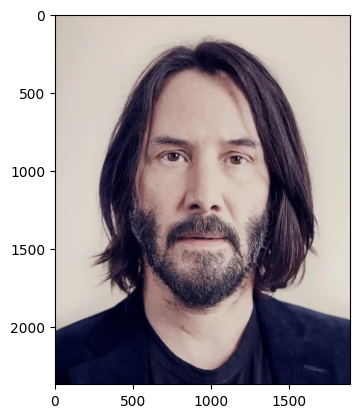

In [78]:
results = compare_face_with_folder("keanu_reaves/keanu01.png", "keanu_reaves/")

In [79]:
# plot results in a dataframe
df = pd.DataFrame(results)
df = df.sort_values(by=['verified'], ascending=False)

df

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time
0,True,4.440892e-16,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.72
1,True,3.260157e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.49
2,True,2.002078e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.56
3,True,2.192202e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.48
4,True,3.105329e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.56
6,True,3.855624e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.84
7,True,2.230741e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.54
9,True,3.764340e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.50
5,False,7.019925e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.52
8,False,7.270893e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.63


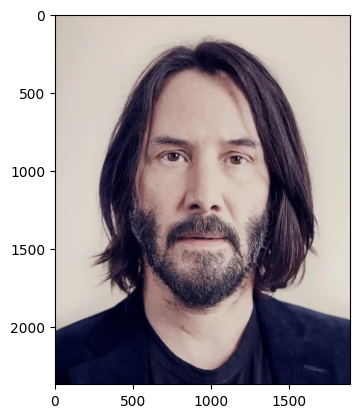

[{'verified': False,
  'distance': 0.826109790879819,
  'threshold': 0.4,
  'model': 'Facenet',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': 1101},
   'img2': {'x': 92, 'y': 575, 'w': 1001, 'h': 1001}},
  'time': 1.5},
 {'verified': False,
  'distance': 0.44522809096483607,
  'threshold': 0.4,
  'model': 'Facenet',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': 1101},
   'img2': {'x': 493, 'y': 494, 'w': 963, 'h': 963}},
  'time': 1.51},
 {'verified': False,
  'distance': 0.6779094550953786,
  'threshold': 0.4,
  'model': 'Facenet',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': 1101},
   'img2': {'x': 112, 'y': 489, 'w': 1081, 'h': 1081}},
  'time': 1.25},
 {'verified': False,
  'distance': 0.7026838433750375,
  'threshold': 0.4,
  'model': 

In [89]:
results = compare_face_with_folder("keanu_reaves/keanu01.png", "jhonny_depp/", enforce_detection=False)

In [90]:
df = pd.DataFrame(results)
df = df.sort_values(by=['verified'], ascending=False)

df

,verified,distance,threshold,model,detector_backend,similarity_metric,facial_areas,time
0,True,4.440892e-16,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.72
1,True,3.260157e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.49
2,True,2.002078e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.56
3,True,2.192202e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.48
4,True,3.105329e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.56
6,True,3.855624e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.84
7,True,2.230741e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.54
9,True,3.764340e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.50
5,False,7.019925e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.52
8,False,7.270893e-01,0.4,VGG-Face,opencv,cosine,"{'img1': {'x': 410, 'y': 485, 'w': 1101, 'h': ...",1.63


In [91]:
def find_faces_in_folder(img_path: str, folder_path: str, enforce_detection: bool = True):
    dfs = DeepFace.find(img_path=img_path, db_path=folder_path, model_name="Facenet", enforce_detection=enforce_detection, detector_backend="opencv", distance_metric="cosine")

    return dfs

In [92]:
dfs = find_faces_in_folder("keanu_reaves/keanu01.png", "keanu_reaves/")

dfs

Finding representations: 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


Representations stored in keanu_reaves//representations_facenet.pkl file.Please delete this file when you add new identities in your database.
find function lasts  7.006159543991089  seconds


[                    identity  source_x  source_y  source_w  source_h  \
 0  keanu_reaves//keanu01.png       410       485      1101      1101   
 1  keanu_reaves//keanu03.png       410       485      1101      1101   
 2  keanu_reaves//keanu08.png       410       485      1101      1101   
 3  keanu_reaves//keanu04.png       410       485      1101      1101   
 4  keanu_reaves//keanu02.png       410       485      1101      1101   
 5  keanu_reaves//keanu05.png       410       485      1101      1101   
 6  keanu_reaves//keanu10.png       410       485      1101      1101   
 7  keanu_reaves//keanu07.png       410       485      1101      1101   
 
    Facenet_cosine  
 0        0.000000  
 1        0.137265  
 2        0.184023  
 3        0.194981  
 4        0.234199  
 5        0.243303  
 6        0.268603  
 7        0.349067  ]

Deepface is a hybrid face recognition package. It currently wraps many state-of-the-art face recognition models: VGG-Face , Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace, Dlib and SFace. The default configuration uses VGG-Face model.

In [93]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
]

#face verification
result = DeepFace.verify(img1_path = "scarlett johansson/scarlett01.png",
      img2_path = "scarlett johansson/scarlett02.png",
      model_name = models[0]
)

#face recognition
dfs = DeepFace.find(img_path = "scarlett johansson/scarlett01.png",
      db_path = "scarlett johansson/",
      model_name = models[1]
)

#embeddings
embedding_objs = DeepFace.represent(img_path = "scarlett johansson/scarlett01.png",
      model_name = models[2]
)

ValueError: Confirm that scarlett johansson/scarlett01.png exists

## Face Models:

FaceNet, VGG-Face, ArcFace and Dlib are overperforming ones based on experiments. You can find out the scores of those models below on both Labeled Faces in the Wild and YouTube Faces in the Wild data sets declared by its creators.

<p align="center">
  <img src="face_recognition_models.png" alt="Models" style="width: 125px; height: auto"/>
</p>

| Model            |	LFW Score	| YTF Score |
|------------------|  -------- |    ----- |
| Facenet512       |	99.65% | 	- |
| SFace	99.60%  | 	-  |
| ArcFace |	99.41%  |	-  |
| Dlib |	99.38%  |	-  |
| Facenet |	99.20%  |	-  |
| VGG-Face |	98.78% |	97.40% |
| Human-beings     |	97.53% |	-  |
| OpenFace         |	93.80% |	- |
| DeepID           |	- |	97.05% |